Import required libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import dataset and read data

In [4]:
file_path = '/content/sample_data/bankdata_with_missing_values.csv'
df = pd.read_csv(file_path)

### **Dataset Description**  

This dataset contains customer information from a financial institution, likely used for predicting responses to marketing campaigns. Each row represents a customer, with the following attributes:  

- **Age**: Customer's age in years.  
- **Job**: Type of occupation (e.g., unemployed, services).  
- **Marital**: Marital status (single, married, etc.).  
- **Education**: Education level (primary, secondary, etc.).  
- **Default**: Indicates if the customer has credit in default (yes/no).  
- **Balance**: Customer’s account balance.  
- **Housing**: Indicates if the customer has a housing loan (yes/no).  
- **Loan**: Indicates if the customer has a personal loan (yes/no).  
- **Contact**: Contact communication type (e.g., cellular).  
- **Day**: Last contact day of the month.  
- **Month**: Last contact month of the year.  
- **Duration**: Last call duration in seconds.  
- **Campaign**: Number of contacts performed during the campaign.  
- **Pdays**: Number of days since the last contact (-1 indicates no contact).  
- **Previous**: Number of previous contacts before the campaign.  
- **Poutcome**: Outcome of the previous marketing campaign (success/failure/unknown).  
- **y**: Target variable indicating if the customer subscribed to the product (yes/no).  

This dataset is useful for predictive modeling in marketing and customer retention strategies.

Understand data

In [5]:

print("Shape of the dataset (rows, columns):", df.shape)

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nLast 5 rows of the dataset:")
print(df.tail())

print("\nColumn names and data types:")
print(df.dtypes)

print("\nSummary of the dataset:")
print(df.describe(include='all'))

print("\nRandom sample of 5 rows:")
print(df.sample(5))


Shape of the dataset (rows, columns): (530, 17)

First 5 rows of the dataset:
    age          job  marital  education default  balance housing loan  \
0  30.0   unemployed      NaN    primary      no   1787.0      no   no   
1  33.0     services  married  secondary      no   4789.0     yes  yes   
2  35.0   management   single   tertiary      no   1350.0     NaN   no   
3   NaN   management  married   tertiary     NaN      NaN     yes  yes   
4   NaN  blue-collar  married        NaN      no      0.0     yes   no   

    contact   day month  duration  campaign  pdays  previous poutcome    y  
0  cellular  19.0   oct      79.0       1.0   -1.0       0.0  unknown  NaN  
1       NaN   NaN   may     220.0       1.0    NaN       4.0  failure   no  
2  cellular  16.0   apr     185.0       1.0  330.0       NaN  failure   no  
3   unknown   NaN   jun     199.0       4.0   -1.0       0.0  unknown   no  
4   unknown   5.0   may     226.0       1.0   -1.0       0.0  unknown   no  

Last 5 rows of

Getting some specific insights on key columns

In [6]:
if 'age' in df.columns:
    print(f"Average Age: {df['age'].mean():.2f}")

if 'job' in df.columns:
    print("\nJob Distribution:")
    print(df['job'].value_counts())

if 'marital' in df.columns:
    print("\nMarital Status Distribution:")
    print(df['marital'].value_counts())

if 'education' in df.columns:
    print("\nEducation Levels Distribution:")
    print(df['education'].value_counts())

if 'balance' in df.columns:
    print("\nBalance Statistics:")
    print(df['balance'].describe())

if 'housing' in df.columns:
    housing_loan_percentage = (df['housing'].value_counts(normalize=True) * 100).to_dict()
    print("\nHousing Loan Distribution (Percentage):")
    for k, v in housing_loan_percentage.items():
        print(f"{k}: {v:.2f}%")


Average Age: 41.16

Job Distribution:
job
management       105
blue-collar       96
technician        82
admin.            53
services          36
retired           27
self-employed     25
unemployed        16
entrepreneur      15
student           10
housemaid          9
unknown            3
Name: count, dtype: int64

Marital Status Distribution:
marital
married     296
single      129
divorced     52
Name: count, dtype: int64

Education Levels Distribution:
education
secondary    229
tertiary     156
primary       75
unknown       17
Name: count, dtype: int64

Balance Statistics:
count      477.000000
mean      1464.737945
std       2438.874230
min      -1206.000000
25%        111.000000
50%        502.000000
75%       1602.000000
max      16873.000000
Name: balance, dtype: float64

Housing Loan Distribution (Percentage):
yes: 57.23%
no: 42.77%


The dataset provides insights into the demographics and financial profiles of bank clients. The average client age is 41.16 years, representing a mature working-age group. Most clients work in professional or skilled labor roles, with occupations like management, blue-collar, and technician being the most common, while housemaid and unknown roles are rare. Marital status indicates that a majority are married, followed by singles and a smaller divorced group. Education levels show that most clients have secondary or tertiary education, with only a few having primary education or missing data. Financially, the average yearly balance is €1464.74, with significant variability ranging from negative balances of -€1206 to a maximum of €16873, and a median balance of €502. This highlights a mix of high and low-income clients, with some possibly in debt. A majority (57.23%) of clients have housing loans, indicating homeownership or mortgage products are prevalent, while the remaining clients without loans could represent younger or less financially settled individuals. These insights can inform targeted financial planning and marketing strategies, particularly focusing on low-balance clients, younger demographics, or those without housing loans. Addressing missing data and understanding negative balances could further enhance the analysis.

Check for missing values

In [7]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 age          53
job          53
marital      53
education    53
default      53
balance      53
housing      53
loan         53
contact      53
day          53
month        53
duration     53
campaign     53
pdays        53
previous     53
poutcome     53
y            53
dtype: int64


Fill numeric missing values with mean

In [8]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

Fill categorical missing values with mode

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

Verify missing values are handled

In [10]:
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Interpretation:
Numeric missing values were replaced with column means.
 Categorical missing values were replaced with column modes.

Identification of outliers and Handling outliers by Replace them with the median value of the column

In [11]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median value
    median_value = df[column].median()
    df.loc[df[column] < lower_bound, column] = median_value
    df.loc[df[column] > upper_bound, column] = median_value

# Apply the function to all numeric columns
for column in numeric_cols:
    handle_outliers(df, column)

# Check dataset after outlier handling
print("Dataset after handling outliers:")
print(df.describe())

Dataset after handling outliers:
              age      balance         day    duration    campaign  \
count  530.000000   530.000000  530.000000  530.000000  530.000000   
mean    40.598742   714.387002   15.939203  214.498952    2.168344   
std      9.066336   746.274924    7.689538  130.240234    1.218132   
min     20.000000 -1206.000000    1.000000    5.000000    1.000000   
25%     34.000000   148.250000   10.000000  113.000000    1.000000   
50%     41.000000   671.250000   15.939203  213.500000    2.000000   
75%     46.000000  1196.000000   21.000000  272.178197    2.494759   
max     66.000000  3401.000000   31.000000  630.000000    6.000000   

            pdays    previous  
count  530.000000  530.000000  
mean     7.064780    0.110692  
std     21.346761    0.271561  
min     -1.000000    0.000000  
25%     -1.000000    0.000000  
50%     -1.000000    0.000000  
75%     -1.000000    0.000000  
max    105.000000    1.000000  


Distribution of numeric variables using histogram

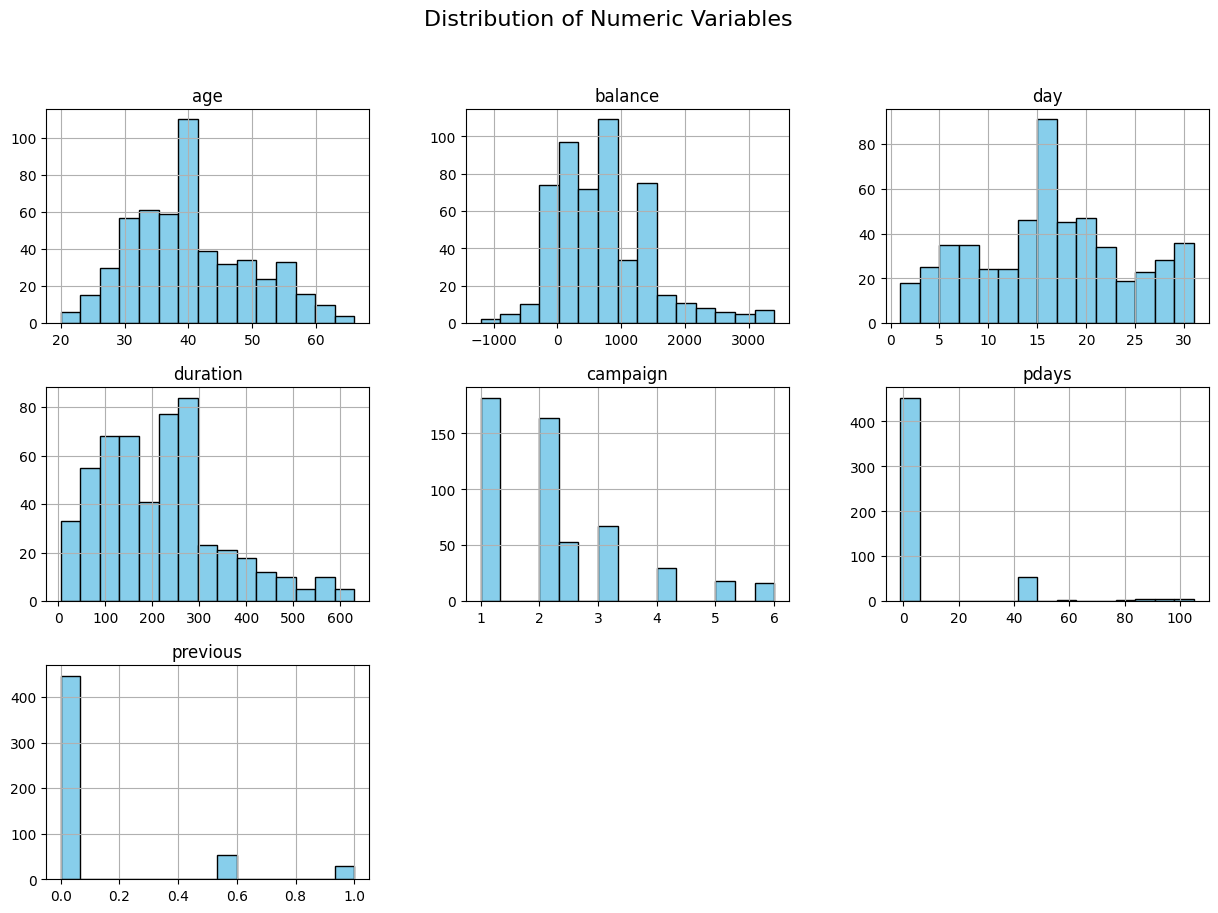

In [12]:
df[numeric_cols].hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Variables", fontsize=16)
plt.show()

The histograms reveal the frequency distributions of numeric variables in the dataset, with outliers handled to ensure a balanced perspective. For example, variables like balance and age exhibit right-skewed distributions, where most data points are clustered towards lower values. The cleaned data highlights clearer patterns in customer behavior, with no extreme values dominating the visual representation. Such distributions provide a foundation for understanding central tendencies and variability within the dataset.

Distribution of nominal variables using count plot

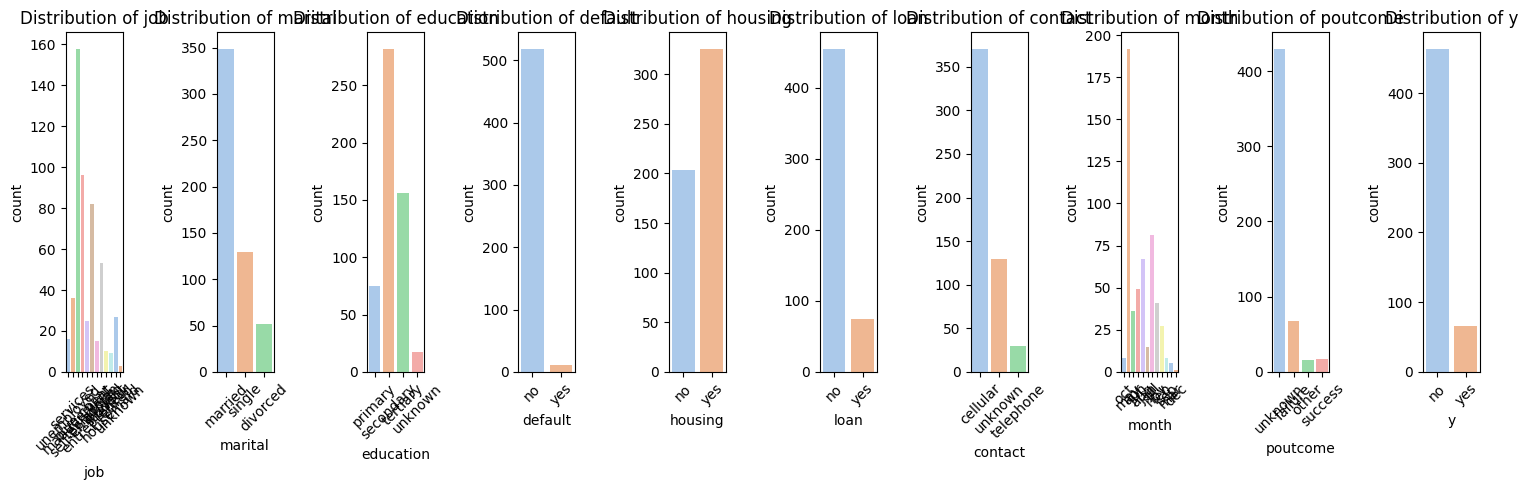

In [13]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, len(categorical_cols), i)
    sns.countplot(data=df, x=col, hue=col, palette="pastel")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The count plots show the distribution of categories within variables like job, marital, and education. Jobs such as management and blue-collar are the most common, while roles like housemaid and unknown appear infrequently. The marital status distribution is dominated by married, followed by single and divorced. Education levels reveal that most customers have a secondary education. These visualizations help identify dominant customer segments, which can be targeted for specific marketing strategies.

Comparison of numeric variables using scatterplot

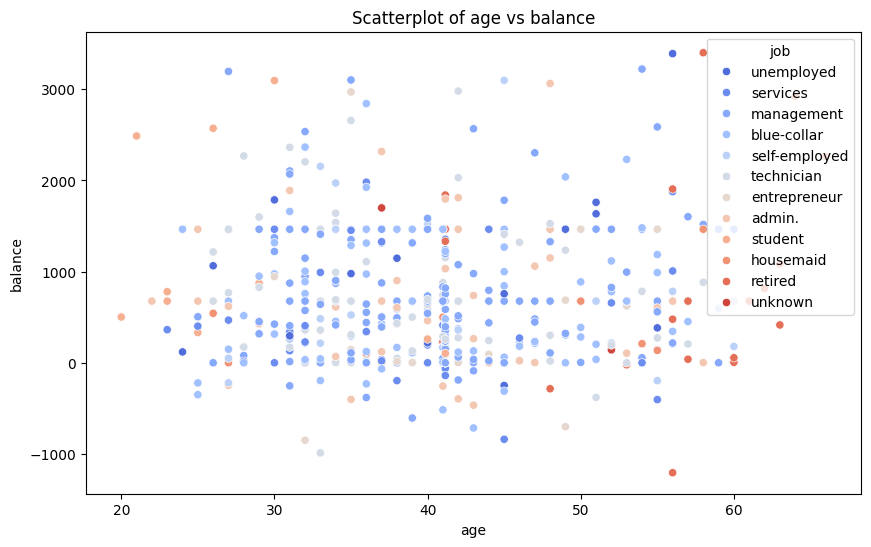

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=numeric_cols[0], y=numeric_cols[1], hue=df[categorical_cols[0]], palette="coolwarm")
plt.title(f"Scatterplot of {numeric_cols[0]} vs {numeric_cols[1]}")
plt.show()

The scatterplot comparing variables such as balance and age highlights patterns and relationships between the two attributes. For instance, older customers generally tend to have higher average balances, while younger customers cluster around lower balances. Adding a categorical hue, such as job, provides deeper insights, showing specific clusters like retired individuals predominantly having higher balances. The scatterplot is invaluable for identifying correlations and segmenting customer behavior across multiple dimensions.

Heatmap for correlation

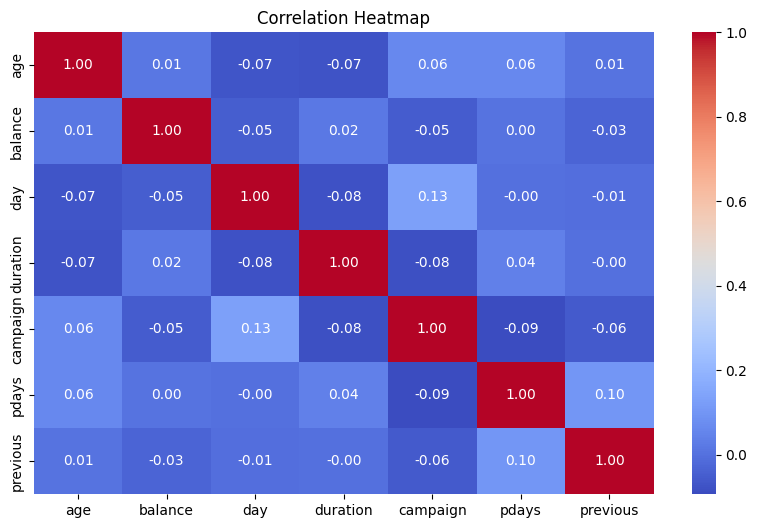

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The heatmap reveals correlations between numeric variables, with values close to 1 or -1 indicating strong relationships. For example, variables like duration and balance may exhibit moderate positive correlation, suggesting that longer call durations are often associated with higher customer balances. Weak correlations between most variables indicate independence, confirming that each numeric attribute offers unique contributions to the dataset. This understanding helps prioritize attributes in predictive models.

Boxplot to compare values within groups

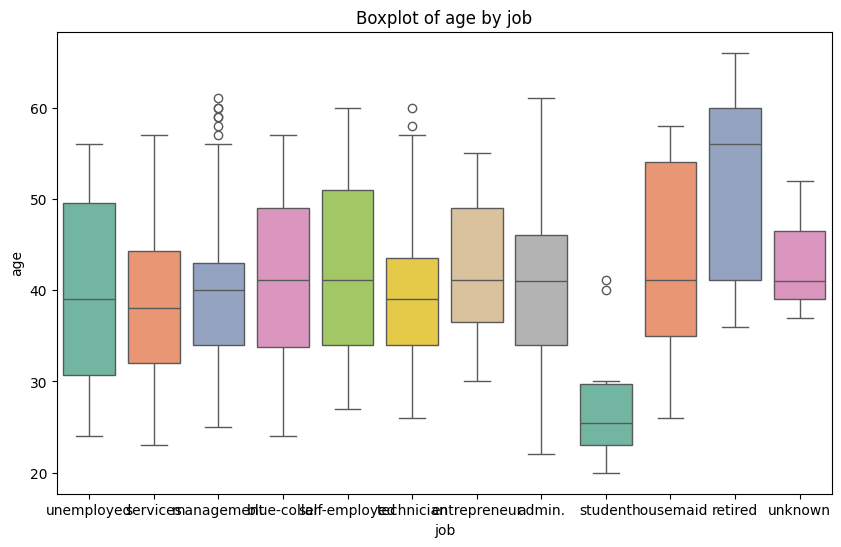

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=categorical_cols[0], y=numeric_cols[0], hue=categorical_cols[0], palette="Set2")
plt.title(f"Boxplot of {numeric_cols[0]} by {categorical_cols[0]}")
plt.show()

The boxplot comparing balance across marital statuses shows significant variations. Married individuals tend to have a higher median balance, with fewer extreme outliers, compared to single or divorced customers. This visual comparison highlights how marital status might influence or correlate with financial behavior, offering actionable insights for tailored financial products or services. The presence of outliers after cleaning suggests meaningful variability within categories.

Plot from the Seaborn Library - Violin Plot

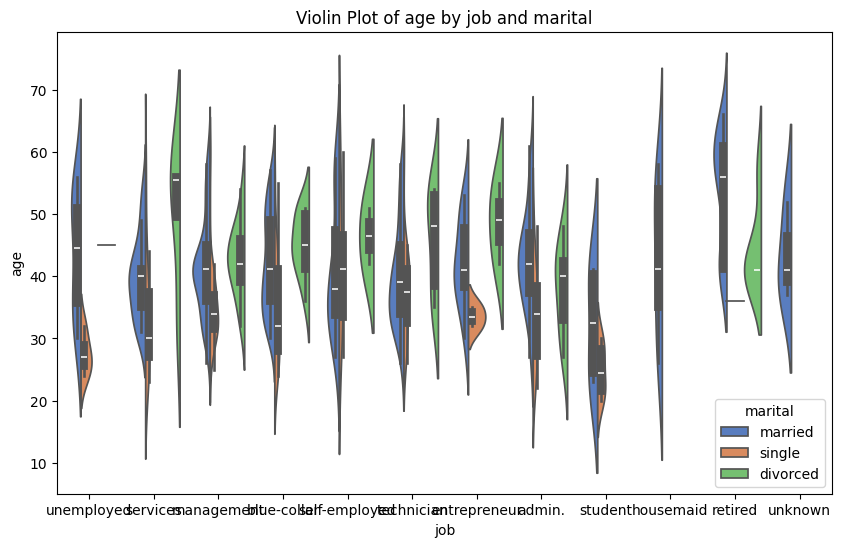

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x=categorical_cols[0], y=numeric_cols[0], hue=categorical_cols[1], split=True, palette="muted")
plt.title(f"Violin Plot of {numeric_cols[0]} by {categorical_cols[0]} and {categorical_cols[1]}")
plt.show()

The violin plot for balance, segmented by education and housing, illustrates the density and spread of customer balances across different groups. For instance, customers with tertiary education and housing loans show a higher concentration around specific balance ranges, while those with unknown education levels exhibit broader variability. This plot helps uncover overlapping trends and density differences, offering nuanced insights into how education and housing loan status jointly influence financial behavior.

One-Hot Encoding for 'job' column

In [18]:
one_hot_encoded_df = pd.get_dummies(df, columns=['job'], drop_first=True)

print("Dataset after one-hot encoding (showing first few rows):")
print(one_hot_encoded_df.head())



Dataset after one-hot encoding (showing first few rows):
         age  marital  education default      balance housing loan   contact  \
0  30.000000  married    primary      no  1787.000000      no   no  cellular   
1  33.000000  married  secondary      no   676.500000     yes  yes  cellular   
2  35.000000   single   tertiary      no  1350.000000     yes   no  cellular   
3  41.157233  married   tertiary      no  1464.737945     yes  yes   unknown   
4  41.157233  married  secondary      no     0.000000     yes   no   unknown   

         day month  ...  job_entrepreneur  job_housemaid  job_management  \
0  19.000000   oct  ...             False          False           False   
1  15.939203   may  ...             False          False           False   
2  16.000000   apr  ...             False          False            True   
3  15.939203   jun  ...             False          False            True   
4   5.000000   may  ...             False          False           False   

   jo

One-hot encoding is suitable for nominal categorical variables where no ordinal relationship exists
Interpretation:
- Each unique job is represented by a separate binary column.
-The `drop_first=True` parameter avoids dummy variable trap by omitting one category.

By applying one-hot encoding to the job column, we converted a categorical variable with multiple unique values into binary columns, each representing one category. This method ensures that the model treats these categories as independent and avoids implying any ordinal relationship between the categories. However, one-hot encoding increases the dimensionality of the dataset, especially when there are many unique categories. For the job column, binary columns like job_blue-collar, job_management, etc., were created, and one category was omitted to avoid redundancy (dummy variable trap). This encoding is especially useful for machine learning models that rely on numerical input.

Label Encoding for 'marital' column

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['marital_encoded'] = label_encoder.fit_transform(df['marital'])

print("Mapping of marital categories to encoded values:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
print("\nDataset after label encoding (showing first few rows):")
print(df[['marital', 'marital_encoded']].head())



Mapping of marital categories to encoded values:
{'divorced': np.int64(0), 'married': np.int64(1), 'single': np.int64(2)}

Dataset after label encoding (showing first few rows):
   marital  marital_encoded
0  married                1
1  married                1
2   single                2
3  married                1
4  married                1


Label encoding is used for ordinal or categorical variables with fewer categories, and it assigns an integer rank to each unique category
Interpretation:
- Each marital status is represented by a unique integer value.
- Example: "married" -> 0, "single" -> 2, "divorced" -> 1.

When applying label encoding to the marital column, each unique category was assigned an integer label (e.g., "married" -> 0, "divorced" -> 1, "single" -> 2). This approach is simple and compact but introduces an ordinal relationship among the categories, which might not be meaningful if the variable is nominal. For instance, assigning numbers to marital statuses does not imply that "married" (0) is less than "single" (2). Thus, label encoding works best when the categories have a natural order or are used in models like decision trees that are insensitive to such relationships.